# KMeans 

KMeans is a unsupervised clustering machine learning algorithm. It is an iterative algorithm. The approach kmeans follows to solve the problem is called Expectation-Maximization.

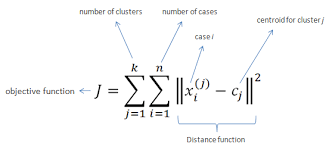



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing

plt.style.use('ggplot')

In [ ]:
x=np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


**Training the model**

In [ ]:
clf=KMeans(n_clusters=2)
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroid=clf.cluster_centers_
labels=clf.labels_

print(centroid)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 0 1 1 0 1]


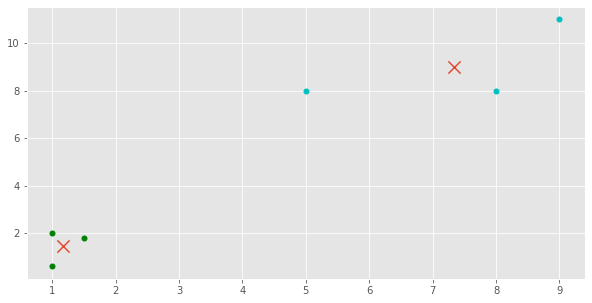

In [ ]:
colors=['g.', 'c.', 'r.', 'y.']
plt.figure(figsize=(10,5))
for i in range(len(x)):
  plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroid[:,0], centroid[:,1], marker='x', s=150, linewidths=5, zorder=10)
plt.show()

# KMeans on Titanic dataset

In [ ]:
df=pd.read_excel('/content/drive/My Drive/Colab Notebooks/ML Algorithms/DataSets/titanic.xls')
df.drop(['body', 'name'], 1, inplace=True)
df.convert_dtypes(convert_integer=True)
df.fillna(0, inplace=True)

df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,0,C,0,0
1305,3,0,female,0.0000,1,0,2665,14.4542,0,C,0,0
1306,3,0,male,26.5000,0,0,2656,7.2250,0,C,0,0
1307,3,0,male,27.0000,0,0,2670,7.2250,0,C,0,0


**Handle the non-numeric values**

In [ ]:
def handle_non_numerical_data(df):
  columns=df.columns.values
  for column in columns:
    text_digit_vls={}
    def convert_to_digit(val):
      return text_digit_vls[val]
    
    if df[column].dtype!=np.int64 or df[column].dtype!=np.float64:
      column_values=df[column].values.tolist()
      diff_values=set(column_values)
      y=1
      for x in diff_values:
        if x not in text_digit_vls:
          text_digit_vls[x]=y
          y+=1
      
      df[column]=list(map(convert_to_digit, df[column]))
  
  return df

In [ ]:
df=handle_non_numerical_data(df)

**Seperating the featureset and labels**

In [ ]:
x=np.array(df.drop(['survived'], 1).astype(float))
x=preprocessing.scale(x)
y=np.array(df['survived'])

In [ ]:
clf2=KMeans(n_clusters=2)
clf2.fit(x)

correct=0
for i in range(len(x)):
  new_x=np.array(x[i].astype(float))
  new_x=x[i].reshape(-1, len(new_x))
  result=clf2.predict(new_x)
  if result==y[i]:
    correct+=1

print(correct/len(x))

0.1917494270435447


#KMean from scratch

In [ ]:
x=np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

colors = 10*["g","r","c","b","k"]

In [ ]:
class K_Means:
  def __init__(self, k=2, tol=0.001, itrs=300):
    self.k=k
    self.tol=tol
    self.itrs=itrs
  
  def fit(self, data):
    self.centroids={}

    for i in range(self.k):
      self.centroids[i]=data[i]

    for itr in range(self.itrs):
      self.classification={}

      for i in range(self.k):
        self.classification[i]=[]
      
      for pnt in data:
        distances=[np.linalg.norm(pnt-self.centroids[centroid]) for centroid in self.centroids]
        index=distances.index(min(distances))
        self.classification[index].append(pnt)
      
      prev_centroids=dict(self.centroids)

      for classification in self.classification:
        self.centroids[classification]=np.average(self.classification[classification], axis=0)
      
      optimized=True

      for c in self.centroids:
        original_centroid=prev_centroids[c]
        current_centroid=self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
          optimized=False
          break
      
      if optimized:
        break
  
  def predict(self, feature):
    distances=[np.linalg.norm(feature-self.centroids[centroid]) for centroid in self.centroids]
    classification=distances.index(min(distances))
    return classification
      


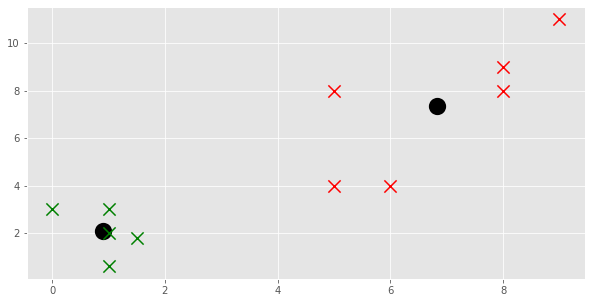

In [ ]:
clf3=K_Means()
clf3.fit(x)

plt.figure(figsize=(10,5))
for c in clf3.centroids:
  plt.scatter(clf3.centroids[c][0], clf3.centroids[c][1], marker='o', color='k', s=150, linewidths=5)

for classification in clf3.classification:
  for feature in clf3.classification[classification]:
    plt.scatter(feature[0], feature[1], color=colors[classification],
              marker='x', s=150, linewidths=5)

plt.show()